# Face Detection Comparison

Several face detection technique:
1. Haar Cascade Classifier
2. Dlib HOG
3. MTCNN

In [1]:
import os
import cv2 as cv
import dlib
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

/home/agusgun/anaconda3/envs/conda_ta/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
model_dir_path = 'model_data/'
CASCADE_CLASSIFIER_MODEL_PATH = os.path.join(model_dir_path, 'haarcascade_frontalface_alt.xml')

In [3]:
cascade_detector = cv.CascadeClassifier(CASCADE_CLASSIFIER_MODEL_PATH)
dlib_hog_detector = dlib.get_frontal_face_detector()
mtcnn_detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
# Not gray img, but RGB
gray_img = cv.cvtColor(cv.imread('../lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg'), cv.COLOR_BGR2RGB)

## Haar Cascade Classifier

In [5]:
import time

In [6]:
start = time.time()
face_bboxes = cascade_detector.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)
end = time.time()
print(end-start)

0.07371735572814941


In [7]:
gray_img_copy = gray_img.copy()
for face in face_bboxes:
    x, y, w, h = face
    cv.rectangle(gray_img_copy, (x,y), (x+w, y+h), (0,255,0), 2)

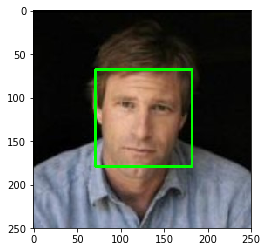

In [8]:
plt.imshow(gray_img_copy, cmap='gray')

## Dlib HOG

In [9]:
start = time.time() 
face_bboxes = dlib_hog_detector(gray_img, 1)
end = time.time()
print(end-start)

0.03689098358154297


In [10]:
gray_img_copy = gray_img.copy()
for face in face_bboxes:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv.rectangle(gray_img_copy, (x,y), (x+w,y+h), (0,255,0), 2)

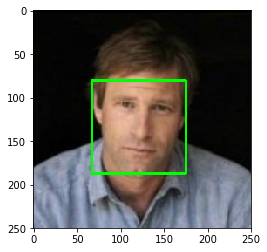

In [11]:
plt.imshow(gray_img_copy, cmap='gray')

## MTCNN

In [12]:
start = time.time()
detection_result = mtcnn_detector.detect_faces(gray_img)
end = time.time()
print(end-start)

0.7852334976196289


In [13]:
gray_img_copy = gray_img.copy()
for face in detection_result:
    face_bbox = face['box']
    x, y, w, h = face_bbox
    
    cv.rectangle(gray_img_copy, (x,y), (x+w,y+h), (0,255,0), 2)

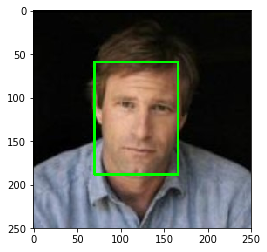

In [14]:
plt.imshow(gray_img_copy, cmap='gray')

## Compare Using Face Detection (Face Bio) Dataset

In [15]:
DIR_PATH = '../BioID-FaceDatabase-V1.2/'
image_path_list = []
eye_path_list = []
for root, dirs, files in os.walk(DIR_PATH):
    for filename in files:
        file_path = os.path.join(root, filename)
        if filename.split('.')[1] == 'pgm':
            image_path_list.append(file_path)
        elif filename.split('.')[1] == 'eye':
            eye_path_list.append(file_path)

In [16]:
image_path_list.sort()
eye_path_list.sort()

In [17]:
eye_position_list = []
for file_path in eye_path_list:
    with open(file_path, 'r') as file:
        eye_position = list(map(int, file.readlines()[1].split()))
        eye_position_list.append(eye_position)

In [18]:
def check_true(eye_position, x, y, w, h):
    # Check X
    if eye_position[0] >= x and eye_position[0] <= x+w and eye_position[2] >= x and eye_position[2] <= x+w:
        if eye_position[1] >= y and eye_position[1] <= y+h and eye_position[3] >= y and eye_position[3] <= y+h:
            return True
    return False

In [19]:
TRUE_RESULT = len(image_path_list)

## First Detection

### Cascade Classifier

In [20]:
start = time.time()
cascade_detector_result = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    face_bboxes = cascade_detector.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    if len(face_bboxes) > 0:
        x, y, w, h = face_bboxes[0]
        
        if check_true(eye_position_list[idx], x, y, w, h):
            cascade_detector_result += 1
end = time.time()
print(end-start)

33.406699419021606


In [21]:
print(cascade_detector_result)

1443


### Dlib HOG

In [22]:
start = time.time()
dlib_hog_result = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    face_bboxes = dlib_hog_detector(img, 1)
    for face in face_bboxes:
        x = face.left()
        y = face.top()
        w = face.right() - x
        h = face.bottom() - y 
        if check_true(eye_position_list[idx], x, y, w, h):
            dlib_hog_result += 1
        break
end = time.time()
print(end-start)

96.03174257278442


In [23]:
print(dlib_hog_result)

1511


### MTCNN

In [24]:
start = time.time()
mtcnn_result = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    detection_result = mtcnn_detector.detect_faces(img)
    for face in detection_result:
        face_bbox = face['box']
        x, y, w, h = face_bbox
        if check_true(eye_position_list[idx], x, y, w, h):
            mtcnn_result += 1
        break
end = time.time()
print(end-start)

37.5677056312561


In [25]:
print(mtcnn_result)

1512


## All Detection

### Cascade Classifier

False Negative


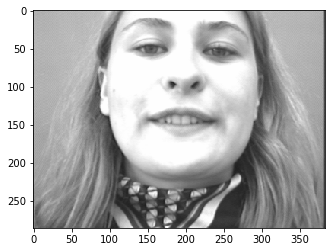

False Negative


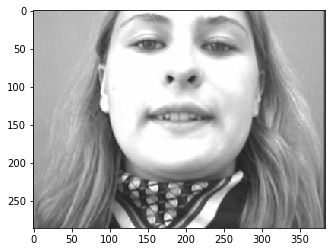

False Negative


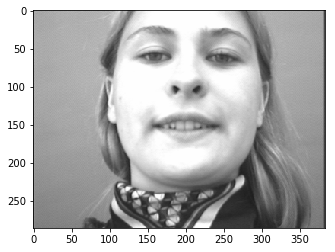

False Negative


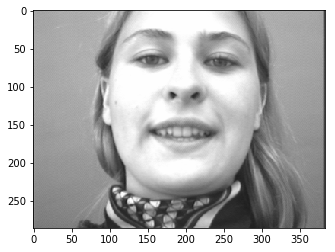

False Negative


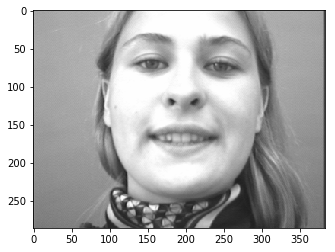

False Negative


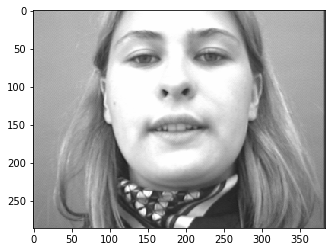

False Negative


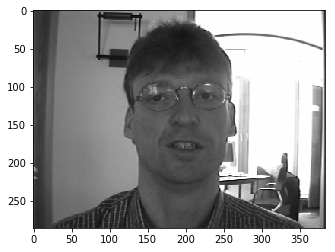

False Negative


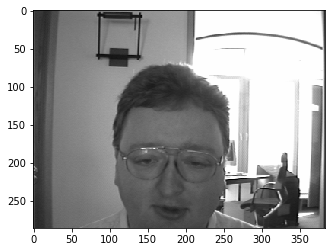

False Negative


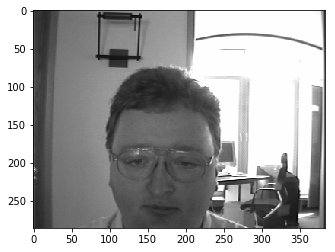

False Negative


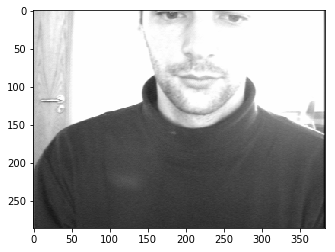

False Negative


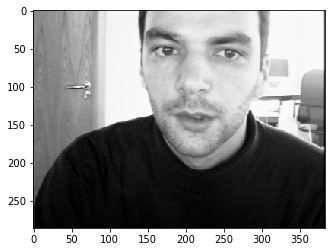

False Negative


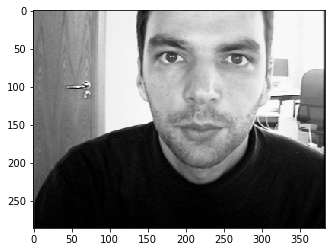

False Negative


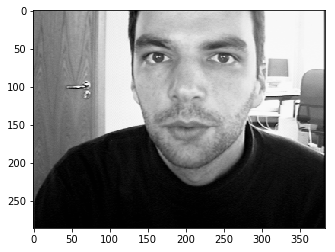

False Negative


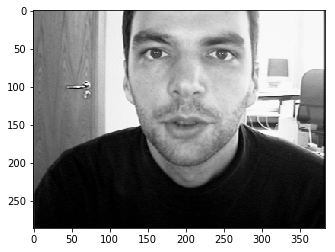

False Negative


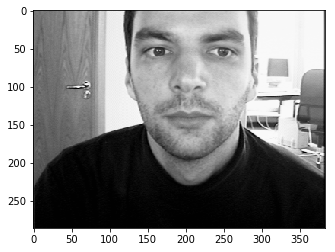

False Negative


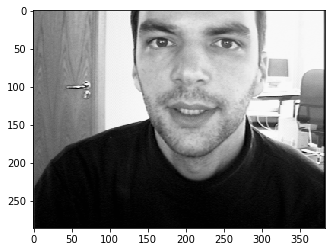

False Negative


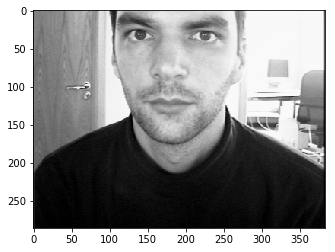

False Negative


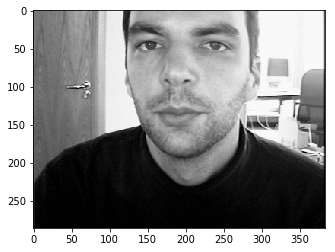

False Negative


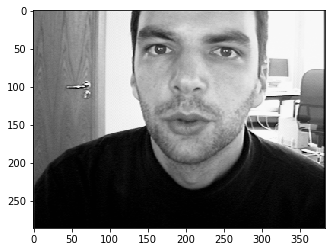

False Negative


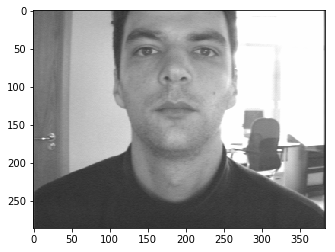

False Negative


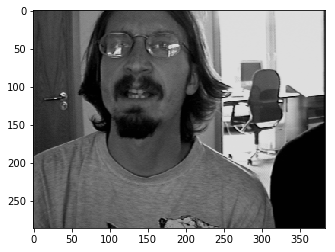

False Negative


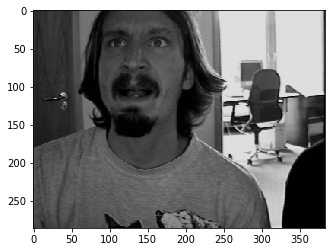

False Negative


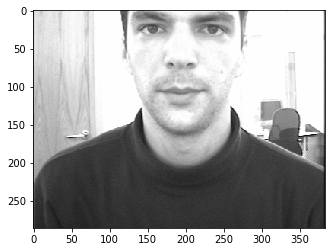

False Negative


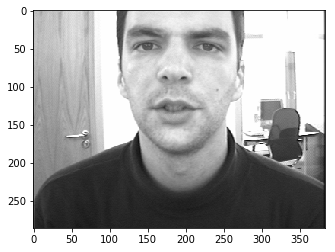

False Negative


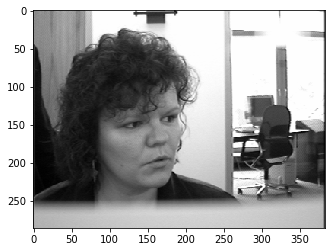

False Negative


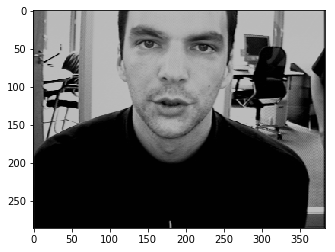

False Negative


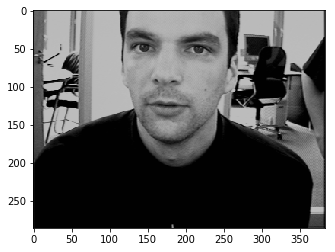

False Positive


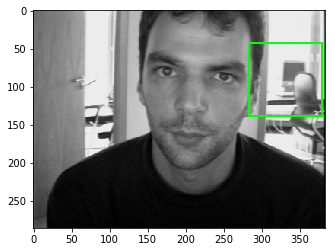

False Positive


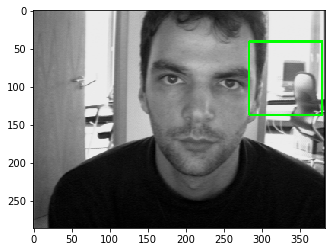

False Negative


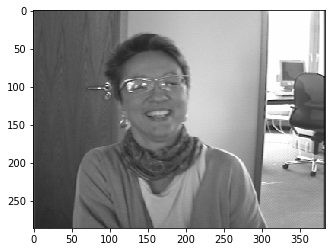

False Positive


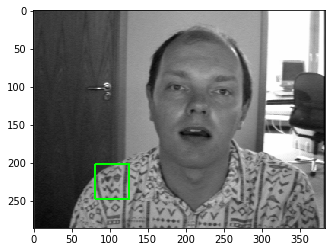

False Positive


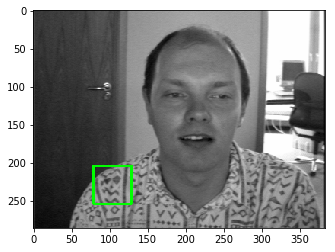

False Positive


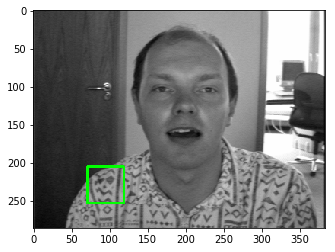

False Positive


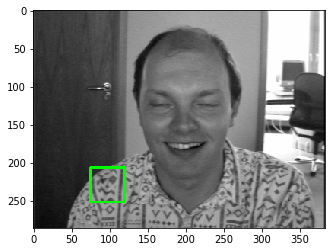

False Positive


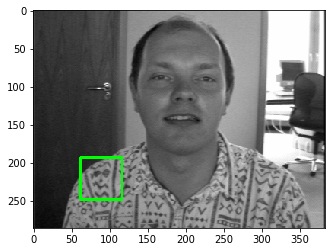

False Positive


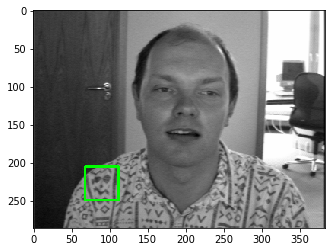

False Positive


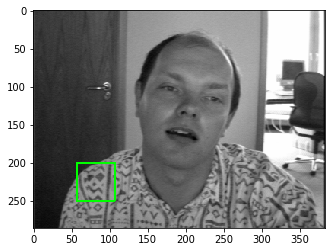

False Positive


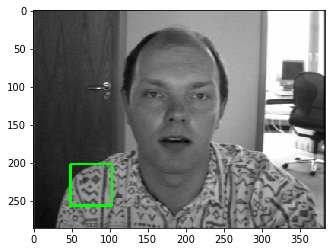

False Negative


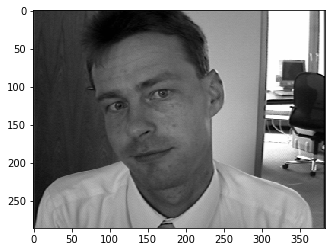

False Negative


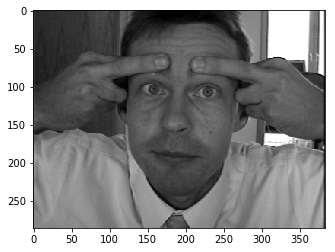

False Negative


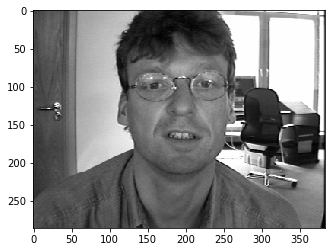

False Negative


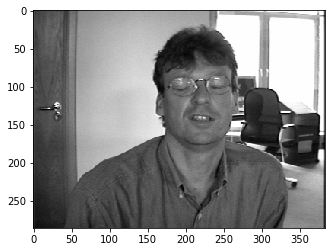

False Negative


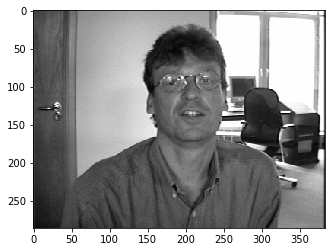

False Negative


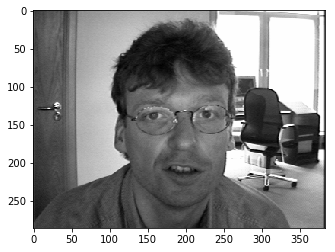

False Negative


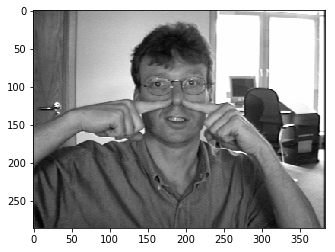

False Negative


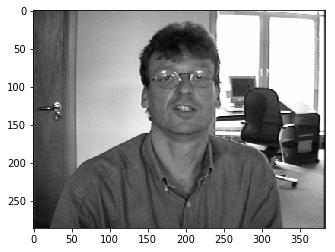

False Negative


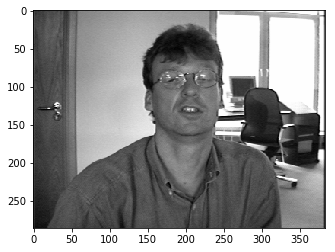

False Negative


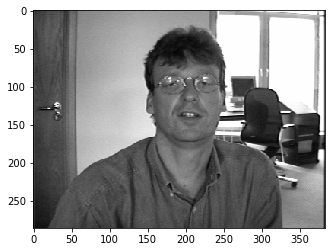

False Negative


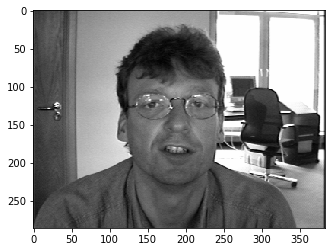

False Negative


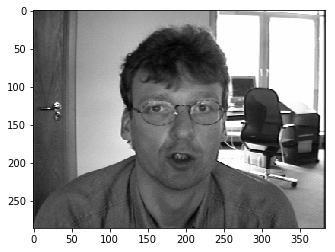

False Negative


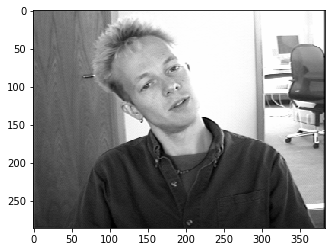

False Negative


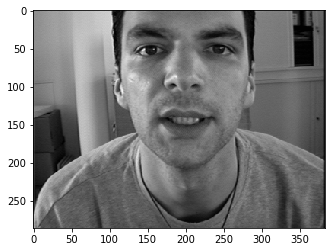

False Negative


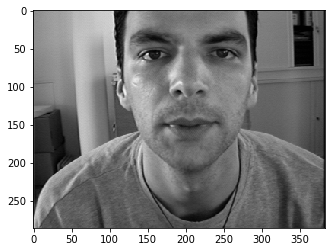

False Negative


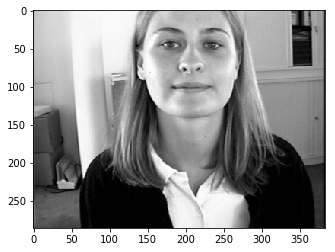

False Negative


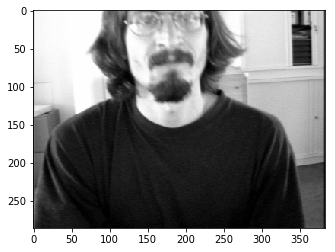

False Negative


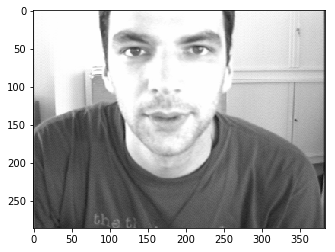

False Negative


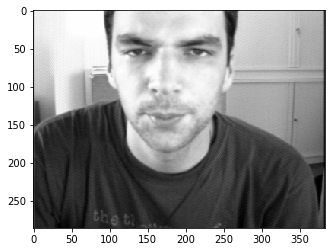

False Negative


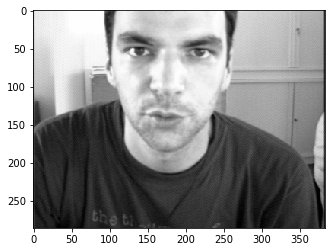

False Negative


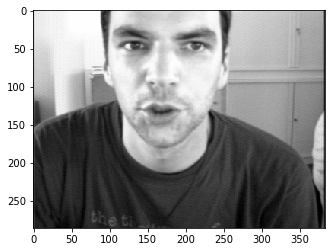

False Negative


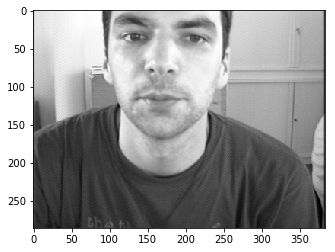

False Negative


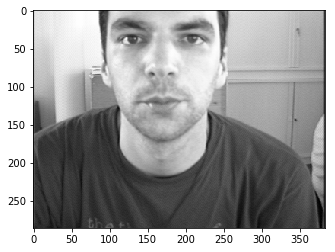

False Negative


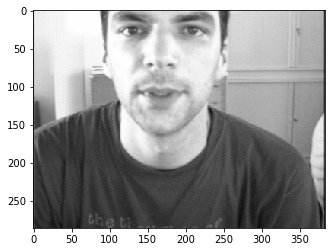

False Negative


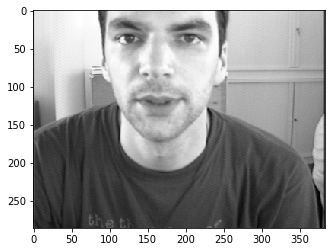

False Negative


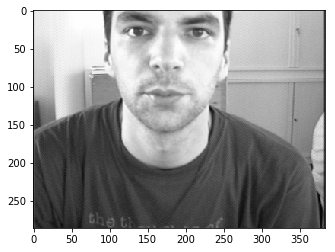

False Negative


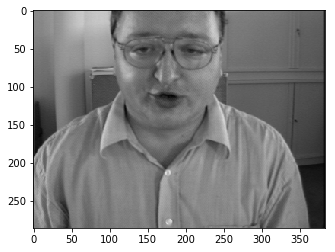

False Negative


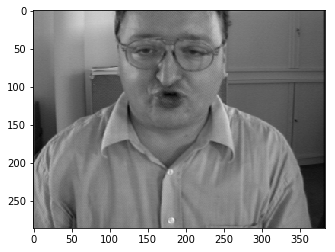

False Negative


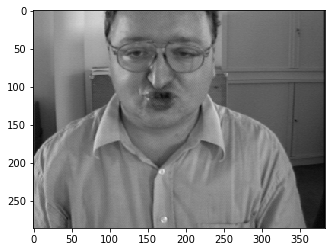

False Negative


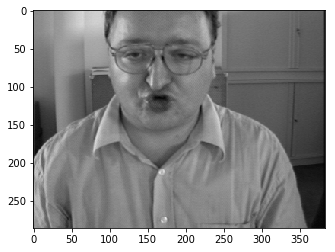

False Negative


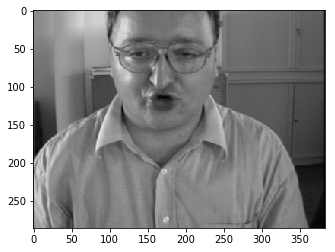

False Negative


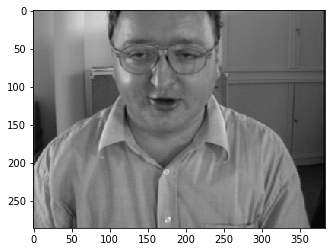

False Negative


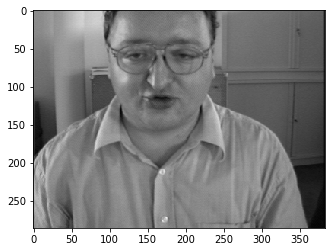

False Negative


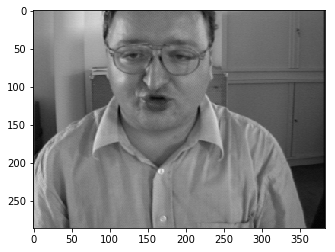

False Negative


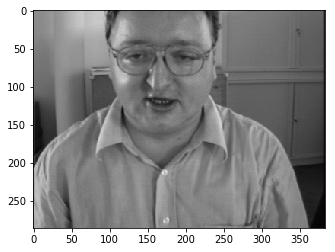

False Negative


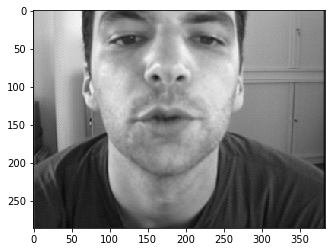

False Negative


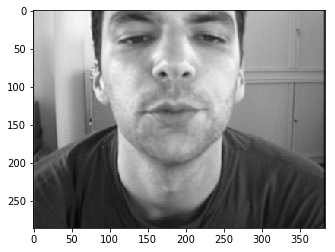

False Negative


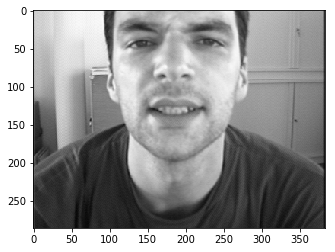

False Negative


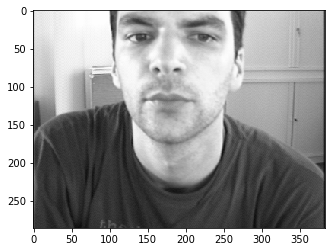

False Negative


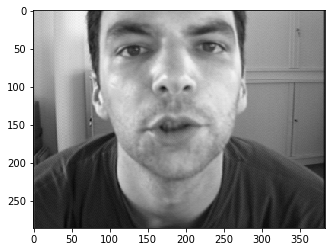

False Negative


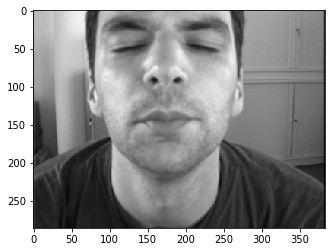

False Negative


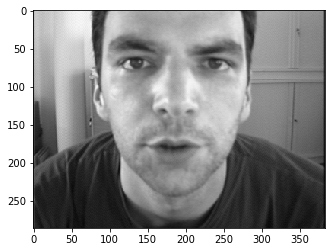

False Negative


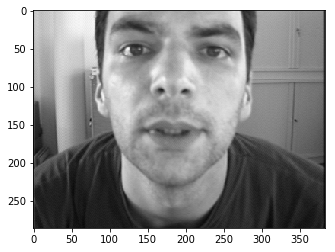

False Negative


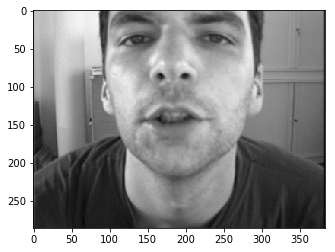

False Negative


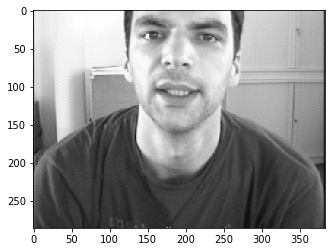

False Negative


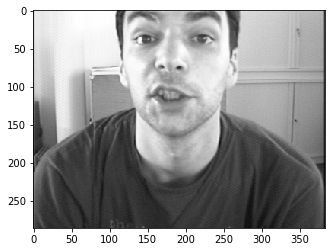

False Negative


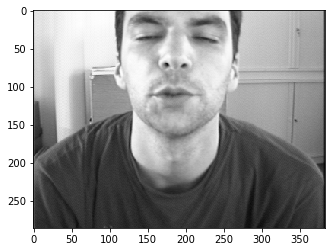

False Negative


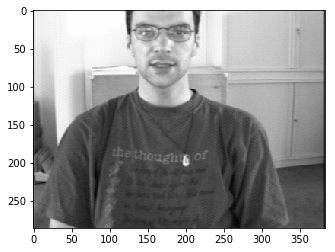

49.931931495666504


In [26]:
start = time.time()
cascade_detector_result = 0
cascade_error_positive = 0
cascade_error_negative = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    face_bboxes = cascade_detector.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    found_face = False
    for face in face_bboxes:
        x, y, w, h = face

        if check_true(eye_position_list[idx], x, y, w, h):
            cascade_detector_result += 1
        else:
            cascade_error_positive += 1
            print("False Positive")
            cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            plt.imshow(img, cmap='gray')
            plt.show()
            
        found_face = True
    if not found_face:
        cascade_error_negative += 1
        print("False Negative")
        plt.imshow(img, cmap='gray')
        plt.show()

end = time.time()
print(end-start)

In [27]:
print(cascade_detector_result)
print(cascade_error_positive)
print(cascade_error_negative)

1444
10
76


### Dlib HOG

False Negative


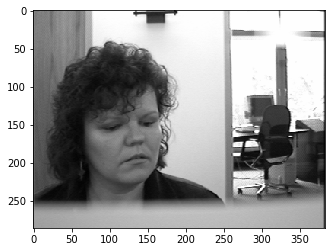

False Negative


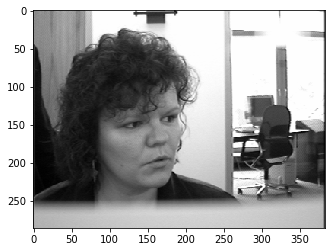

False Negative


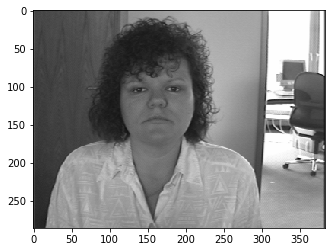

False Negative


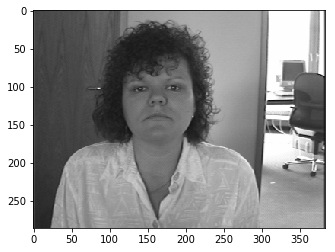

False Positive


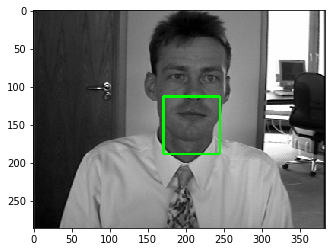

False Negative


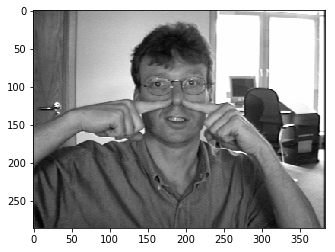

False Negative


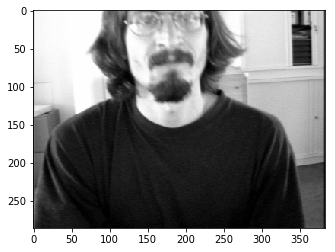

False Negative


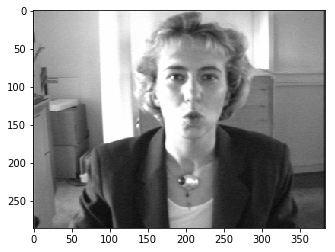

False Negative


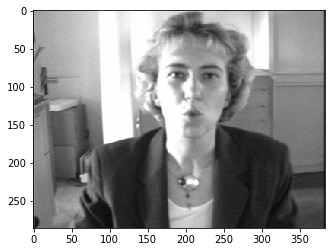

False Negative


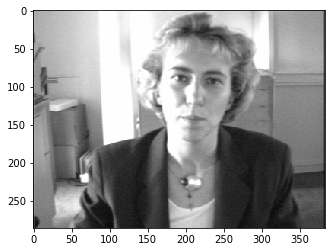

False Negative


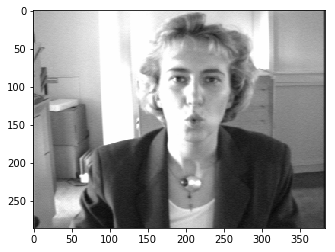

98.47602677345276


In [28]:
start = time.time()
dlib_hog_result = 0
dlib_error_positive = 0
dlib_error_negative = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    face_bboxes = dlib_hog_detector(img, 1)
    found_face = False
    for face in face_bboxes:
        x = face.left()
        y = face.top()
        w = face.right() - x
        h = face.bottom() - y 
        if check_true(eye_position_list[idx], x, y, w, h):
            dlib_hog_result += 1
        else:
            dlib_error_positive += 1
            print("False Positive")
            cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            plt.imshow(img, cmap='gray')
            plt.show()
            
        found_face = True
    if not found_face:
        dlib_error_negative += 1
        print("False Negative")
        plt.imshow(img, cmap='gray')
        plt.show()

end = time.time()
print(end-start)

In [29]:
print(dlib_hog_result)
print(dlib_error_positive)
print(dlib_error_negative)

1511
1
10


### MTCNN

False Negative


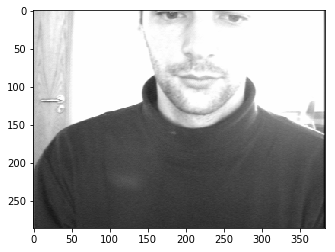

False Negative


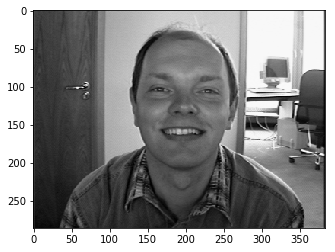

False Positive


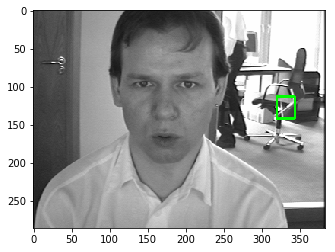

False Positive


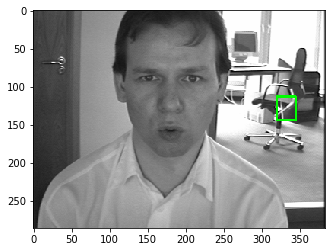

False Positive


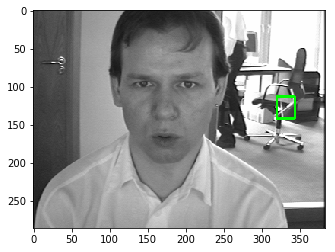

False Positive


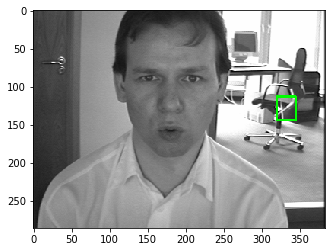

False Negative


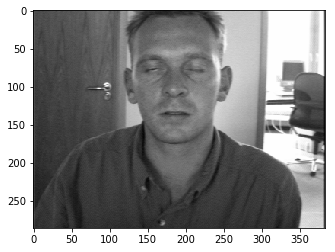

False Negative


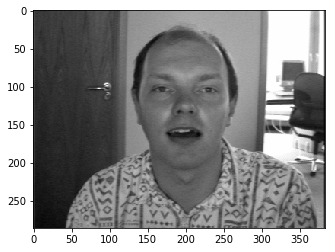

False Negative


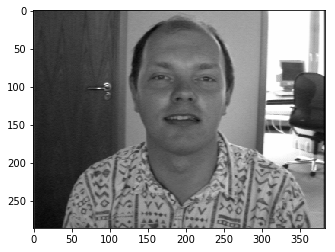

False Negative


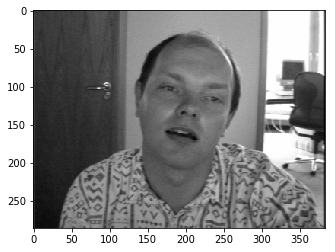

False Negative


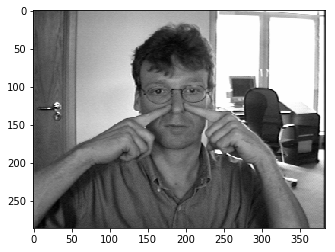

False Negative


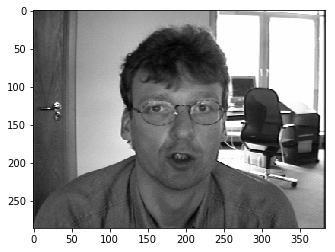

False Positive


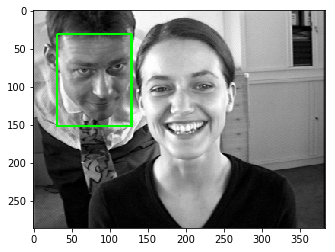

False Negative


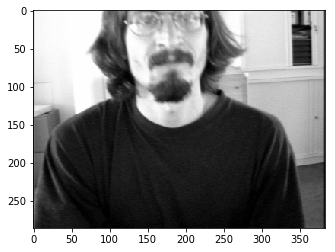

39.963918685913086


In [30]:
start = time.time()
mtcnn_result = 0
mtcnn_error_positive = 0
mtcnn_error_negative = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    detection_result = mtcnn_detector.detect_faces(img)
    found_face = False
    for face in detection_result:
        face_bbox = face['box']
        x, y, w, h = face_bbox
        if check_true(eye_position_list[idx], x, y, w, h):
            mtcnn_result += 1
        else:
            mtcnn_error_positive += 1
            print("False Positive")
            cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            plt.imshow(img, cmap='gray')
            plt.show()
        found_face = True
    if not found_face:
        mtcnn_error_negative += 1
        print("False Negative")
        plt.imshow(img, cmap='gray')
        plt.show()
end = time.time()
print(end-start)

In [31]:
print(mtcnn_result)
print(mtcnn_error_positive)
print(mtcnn_error_negative)

1512
5
9
